<a href="https://colab.research.google.com/github/neha-duggirala/Digit-Recognition/blob/master/digi_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !pip3 install --upgrade tensorflow-gpu==1.4.1
tf.__version__

'1.13.1'

In [0]:
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import numpy as np
import time
print ("Packages Imported!")

Packages Imported!


In [0]:
!ls "/content/drive/My Drive/Colab_Notebooks/Object_detection/opencv/"

Colab_trained_digit.model  digi_recog.ipynb  faceDetection.ipynb


In [0]:
mnist=tf.keras.datasets.mnist

In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


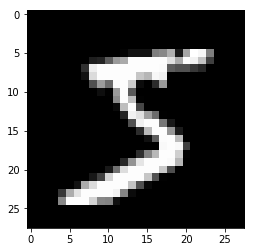

In [0]:
plt.imshow(X_train[0],cmap=plt.cm.gray)

# After normalization

In [0]:
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)


In [0]:
X_train[0].shape

(28, 28)

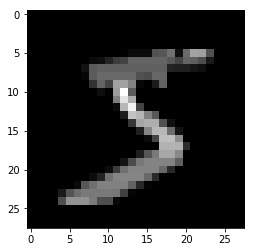

In [0]:
plt.imshow(X_train[0],cmap=plt.cm.gray)

In [0]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2519 - acc: 0.9225
Epoch 2/6
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1035 - acc: 0.9679
Epoch 3/6
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0763 - acc: 0.9752
Epoch 4/6
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0559 - acc: 0.9821
Epoch 5/6
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0455 - acc: 0.9848
Epoch 6/6
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0362 - acc: 0.9877


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(128,input_shape=(28,28), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y_pre=model.predict(X_test)


In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
np.argmax(y_pre[3])

0

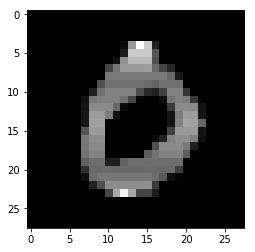

In [0]:
plt.imshow(X_test[3],cmap=plt.cm.gray)

## Accuracy

In [0]:
loss,acc=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0985 - acc: 0.9738


In [0]:
print ("Accuracy of the model is ",acc*100)

Accuracy of the model is  97.3800003528595


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save("/content/drive/My Drive/Colab_Notebooks/Object_detection/opencv/Colab_trained_digit3.model")